In [ ]:
from SpectraHitran.SpectraGenerator.spectragenerator import SpectraGenerator
from SpectraHitran.SpectraProcessing.spectraprocessing import branchClassification, plotSpectrum, spectrogramFromSpectra
from SpectraHitran.SpectraFit.spectrafit import filterLine,singleLineFit, multipleLineFit

import numpy as np
from scipy.signal import spectrogram
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

# Simulando espectros e processando espectros

In [ ]:
s = SpectraGenerator()

s.downloadMolecule('HCl', (52,53), (5300,5900))


temperature, pressure, optical_length = 310.9682645024715, 0.8, 5

#pressure = 0.23 #atm
#temperature = 295.59 # Kelvin
#optical_length = 5 #cm

#Simulando o espectro
s.simulateSpectra('HCl',{'air':0, 'self':1}, {'l':optical_length,'p':pressure,'T':temperature},step=0.01)
#s.spectra['absorption'] /= optical_length

valor = np.random.uniform(0,1)
ruido_std = valor * np.mean(s.spectra['absorption'])  # 1% do valor médio
s.spectra['absorption'] = np.random.normal(s.spectra['absorption'], ruido_std)

print(valor)
# Organizando as linhas
lines = branchClassification(s.spectra, findPeaksParams={'height': 0.15, 'width': 5, 'distance': None},thresoldBranch=5665)

lines['pressure'] = pressure
lines['temperature'] = temperature

# Realizando o fit das linhas pelo perfil de Voigt

plotSpectrum(s.spectra,lines)

In [ ]:
x,y = filterLine(s.spectra,lines.loc[5,'wavenumber'],lines.loc[5,'absorption'],0.01)

plt.plot(s.spectra['wavenumbers'],s.spectra['absorption'])
plt.plot(x,y,c='red')
plt.show()


chute= 8e-3
final, result, params, successful = singleLineFit(y, x, lines.loc[5,'wavenumber'],chute, chute, vgamma=True, vsigma=True)

plt.scatter(x=x,y=y)
plt.plot(x,final,c='red')
plt.show()
result

In [ ]:
pressure = 0.200 #atm
temperature = 293 # Kelvin

optical_length = 2 #cm

#Simulando o espectro
s.simulateSpectra('HCl',{'air':0, 'self':1}, {'l':optical_length,'p':pressure,'T':temperature},step=0.01)
s.spectra['absorption'] = s.spectra['absorption'] + np.random.normal(0.1,0.002, len(s.spectra['absorption']))
plt.plot(s.spectra['wavenumbers'],s.spectra['absorption'])

In [ ]:
!ls

{'air': 0, 'self': 1}
0.664945 seconds elapsed for abscoef; nlines = 757
2.582302662544821


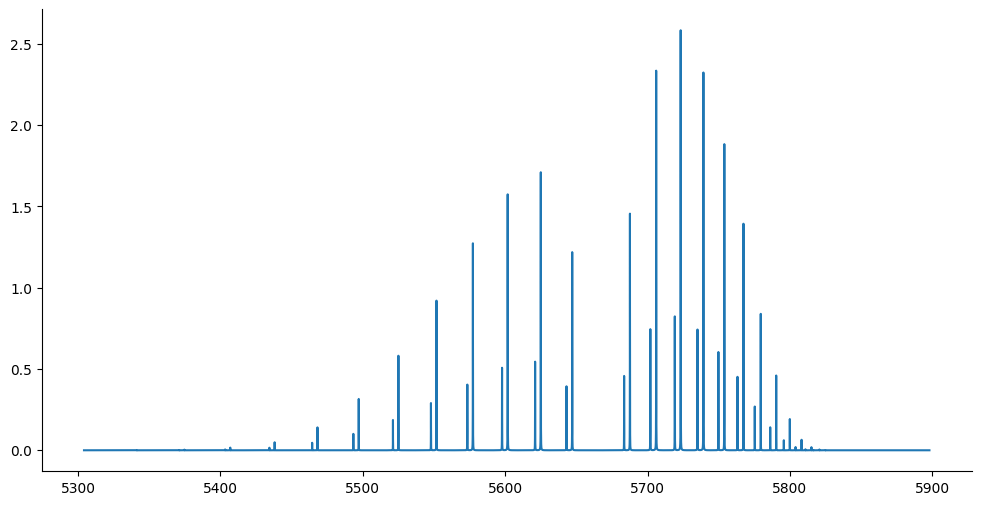

In [ ]:
from hapi import *

temperature, pressure, optical_length = 213.15, 145 / 1013, 10

nome, diluent, enviroment = 'HCl',{'air':0, 'self':1}, {'l':optical_length,'p':pressure,'T':temperature}


wv, abc = absorptionCoefficient_Voigt(SourceTables = nome,
                                      Diluent= diluent, 
                                      Environment= enviroment, 
                                      HITRAN_units = False,
                                      WavenumberStep = 0.01,
                                      WavenumberWing = 50)

transm = np.exp(-abc * optical_length)
ab = - np.log10(transm)
            
#wv, ab = absorptionSpectrum(wv,
#                            abc,
#                            Environment = enviroment)
            
wvc, abcc, _, _, _ = convolveSpectrum(wv,
                                   ab,
                                   SlitFunction= SLIT_MICHELSON,
                                   Resolution = 0.02,
                                   AF_wing = 0.1 ) 
            
print(abcc.max())
plt.plot(wvc,abcc);

In [141]:
prod = pd.read_csv('../database/lines/lines_prod.csv')

In [316]:
prod.query('pressure == 145')[['temperature','intensity']].describe().T

,count,mean,std,min,25%,50%,75%,max
temperature,110.0,293.150000,1.713107e-13,293.15000,293.15000,293.15000,293.15000,293.15000
intensity,110.0,1.208369,4.717831e-01,0.12675,0.87873,1.23987,1.65909,1.82277


In [148]:
prod['pressure'].unique()

array([ 78. , 145. , 200. , 398. , 790. ,  27. ,  76.9, 141. , 211. ,
       181. , 218. , 301. , 439. ])

In [56]:
abcc

array([1.88866082e-07, 1.88502874e-07, 1.88141561e-07, ...,
       3.77970939e-07, 3.77886265e-07, 3.77801620e-07])

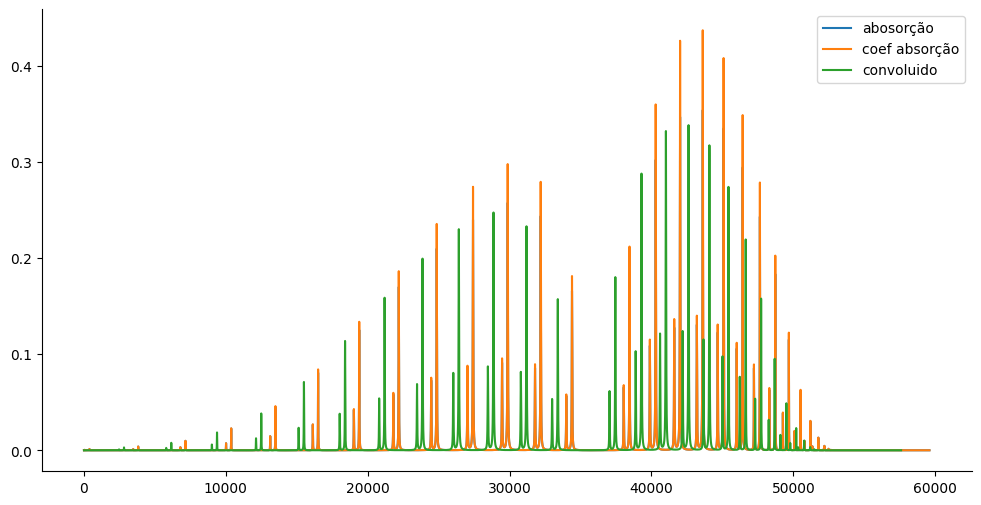

In [58]:
plt.plot(ab, label='abosorção')
plt.plot(abc, label= 'coef absorção')
plt.plot(abcc, label='convoluido')
plt.legend()

In [ ]:
data = pd.read_csv('../database/lines/lines_train.csv')
data

In [303]:
arqs = os.listdir('../database/lines/train')

data = pd.DataFrame()
for arq in arqs:
    data = pd.concat([data,pd.read_csv("../database/lines/train/"+arq)])

data = data.reset_index(drop=True)
data = data.drop(columns=['Unnamed: 0'])
display(data)
data.to_csv('../database/lines/lines_train_2.csv', index=None)

/tmp/ipykernel_4974/3972111183.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data,pd.read_csv("../database/lines/train/"+arq)])
/tmp/ipykernel_4974/3972111183.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data,pd.read_csv("../database/lines/train/"+arq)])


,wavenumber,absorption,branch,j,m,pressure,temperature,evals,npoints,r2,...,center,center_std,sigma,sigma_stderr,gamma,gamma_stderr,fwhm,fwhm_stderr,height,height_stderr
0,5468.138568,0.251447,P,14.0,-14.0,0.237379,314.784852,62.0,32.0,0.996517,...,5468.143920,0.000717,0.031079,0.001498,0.006175,0.002390,0.080013,0.001385,0.257886,0.003901
1,5497.128568,0.420398,P,13.0,-13.0,0.237379,314.784852,214.0,46.0,0.996427,...,5497.129799,0.000641,0.026591,0.001347,0.018826,0.001748,0.085151,0.001419,0.425381,0.005536
2,5521.158568,0.190603,P,12.0,-12.0,0.237379,314.784852,51.0,47.0,0.993623,...,5521.172334,0.000868,0.026398,0.002094,0.026285,0.002428,0.094907,0.002150,0.194043,0.003207
3,5524.998568,0.602580,P,11.0,-11.0,0.237379,314.784852,112.0,65.0,0.997418,...,5524.999625,0.000498,0.025545,0.001176,0.026658,0.001334,0.093573,0.001229,0.612688,0.005867
4,5547.868568,0.248330,P,10.0,-10.0,0.237379,314.784852,49.0,52.0,0.996457,...,5547.865624,0.000642,0.023443,0.001801,0.035302,0.001752,0.101987,0.001746,0.253550,0.002977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5737,5775.348568,0.251533,R,12.0,13.0,0.137478,286.799005,119.0,14.0,0.993622,...,5775.351969,0.001336,0.029415,0.003656,0.000017,0.006904,0.069285,0.002011,0.260165,0.007064
5738,5779.548568,0.791762,R,13.0,14.0,0.137478,286.799005,154.0,13.0,0.995178,...,5779.548780,0.001182,0.029837,0.003823,0.000002,0.007485,0.070263,0.001715,0.810173,0.018885
5739,5786.198568,0.153008,R,14.0,15.0,0.137478,286.799005,71.0,13.0,0.990930,...,5786.203839,0.001797,0.028334,0.004860,0.000009,0.009681,0.066730,0.002269,0.158654,0.005465
5740,5790.408568,0.482055,R,15.0,16.0,0.137478,286.799005,132.0,13.0,0.991285,...,5790.409724,0.001708,0.028238,0.004540,0.000020,0.008702,0.066517,0.002325,0.497026,0.017180


In [274]:
np.random.normal(305,10,8) - 273.15

array([31.33526854, 15.26471731, 17.89669186, 36.54681176, 33.55206409,
       23.70644745, 36.50539517, 35.0923077 ])